In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', 50)


In [2]:
!dir ..\output

 �h���C�u D �̃{�����[�� ���x���� �{�����[�� �ł�
 �{�����[�� �V���A���ԍ��� 5C06-DFA8 �ł�

 d:\000_devs\003_kaggle_Rainforest-Connection-Species-Audio-Detection\Rainforest-Connection-Species-Audio-Detection\output �̃f�B���N�g��

2021/02/18  08:06    <DIR>          .
2021/02/18  08:06    <DIR>          ..
2021/02/17  13:34           889,028 b_submission0888.csv
2021/02/18  03:12           934,357 b_submission_exp_44.csv
2021/02/17  13:01           936,181 b_submission_time_min_40_0.85.csv
2021/02/17  23:14           935,779 b_submission_time_min_43.csv
2021/02/17  12:55           525,494 submission877.csv
2021/02/15  07:28           937,064 submission_exp_33_relativemixup.csv
2021/02/15  17:41           936,124 submission_exp_35_FocusOnTImeTrivialNoSpec.csv
2021/02/16  09:11           935,938 submission_exp_40_bagging1_spec10.csv
2021/02/16  16:24           939,167 submission_exp_40_bagging1_spec10_min.csv
2021/02/16  22:18           935,561 submission_exp_41_bagging2_spec10_epoch30.csv
2

In [3]:
dfs = []

dfs.append(pd.read_csv(Path("../output/b_submission_time_min_40_0.85.csv")).sort_values('recording_id')) # 0.850
dfs.append(pd.read_csv(Path("../output/b_submission_time_min_43.csv")).sort_values('recording_id')) # 0.850
dfs.append(pd.read_csv(Path("../output/b_submission_exp_44.csv")).sort_values('recording_id')) # 0.850
dfs.append(pd.read_csv(Path("../output/b_submission0888.csv")).sort_values('recording_id')) # 0.877

for df in dfs:
    display(df.head(1))
    display(df.values[0][1:].sum())
    display()


,recording_id,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
1619,000316da7,-4.385962,-5.209153,-4.866416,2.433722,-5.875193,-3.52861,-4.545398,-3.529104,-5.965879,-4.727323,-5.91406,-4.537738,3.082799,-6.421977,-3.716737,-2.814886,-5.828997,-4.651875,-3.010005,-5.468377,-5.338098,-6.334151,-2.826548,-3.33984


-97.3198037147522

,recording_id,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
1619,000316da7,-4.334188,-5.25449,-4.131619,3.054275,-5.665588,-3.525176,-4.021821,-3.708809,-6.21305,-4.875082,-5.362048,-5.350348,0.266713,-6.313294,-4.490533,-4.424561,-5.939427,-4.107741,-4.059312,-5.260619,-5.787228,-5.683568,-5.18115,-2.609685


-102.97835159301758

,recording_id,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
0,000316da7,-4.332404,-5.347629,-5.064229,3.771672,-5.826441,-3.066477,-4.879025,-4.698693,-5.839499,-4.185414,-5.221129,-5.050307,1.078303,-6.602056,-3.995584,-3.954103,-6.814857,-4.842426,-3.553457,-5.806394,-4.888593,-7.207091,-3.997463,-3.747516


-104.07081270217896

,recording_id,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
0,000316da7,3.202613,3.895946,1.706396,7.599547,1.076078,5.293725,0.635732,4.540981,1.910178,3.732816,0.085332,2.067787,6.864664,2.676665,5.81584,5.394237,4.205831,1.205558,6.158976,0.611817,2.685329,4.750577,2.779728,4.499254


83.39560815408683

In [4]:
dfs[0].describe()

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,-5.118227,-5.829824,-5.207319,-1.071227,-6.724855,-5.202419,-6.567163,-3.018345,-6.252657,-5.642111,-6.044493,-5.195903,-2.939373,-6.730776,-5.280562,-4.170498,-5.647015,-5.473116,-4.629457,-6.393554,-6.097198,-6.640199,-5.595734,-4.313977
std,3.419840,2.925900,3.038614,3.351818,2.121465,2.751194,2.559799,3.784110,2.164022,2.312574,3.048506,3.334697,4.668886,2.207496,4.032497,3.674381,4.099059,3.158218,2.741360,2.312079,2.928439,2.507844,2.684428,3.550036
min,-17.340582,-18.960884,-17.190350,-12.547818,-18.873280,-15.787035,-15.311708,-12.804800,-15.231890,-12.307665,-13.599010,-16.178802,-13.433212,-12.268753,-19.660601,-16.007311,-14.396373,-13.729673,-18.499233,-13.237264,-16.321142,-21.061148,-12.099381,-13.285869
25%,-7.221991,-7.683676,-7.082575,-3.519948,-8.098500,-7.138848,-8.252347,-5.570544,-7.547354,-7.117939,-8.008746,-7.546212,-6.081864,-7.914344,-7.706944,-6.393636,-7.974918,-7.458007,-6.488504,-7.848229,-8.167117,-7.997324,-7.106640,-6.484823
50%,-5.637382,-5.608434,-5.536994,-0.860549,-6.780501,-5.544887,-6.511837,-3.101537,-6.361882,-5.734802,-6.195660,-5.300442,-4.145983,-6.777402,-5.446982,-4.737489,-6.028495,-5.336079,-4.611562,-6.246437,-5.917900,-6.430328,-5.813923,-4.692477
75%,-3.724272,-4.046327,-3.934595,1.551221,-5.461817,-3.448828,-4.711454,-1.109416,-5.139829,-4.212046,-4.283902,-2.989275,-1.529301,-5.809322,-2.983024,-3.266332,-4.245712,-3.915061,-2.955116,-4.852932,-3.945721,-5.032031,-4.471053,-3.063674
max,11.077141,6.011437,10.137071,6.735675,7.216008,5.123929,12.711205,7.928565,7.698490,7.788985,14.327687,7.304060,13.828547,14.959384,10.218735,14.931409,16.356571,12.920204,5.943083,23.032665,13.324265,4.560400,17.312244,16.319836


In [5]:
dfs[1].describe()

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,-4.613726,-5.242108,-4.568886,-1.055658,-6.732540,-5.082645,-6.252318,-3.316961,-6.524719,-5.865593,-5.998325,-5.208445,-4.269619,-6.644364,-5.073421,-4.220930,-6.143994,-5.819765,-5.067205,-5.686219,-5.963558,-6.179866,-5.897512,-4.378441
std,3.825195,3.155251,3.361198,3.538816,2.365466,2.952115,2.777192,3.921126,2.205370,2.417925,2.938672,3.405725,4.310647,1.938069,3.670884,4.171592,3.839678,2.982217,3.062977,2.430368,2.904379,2.275468,2.607183,3.614663
min,-14.259071,-14.263394,-11.769987,-11.579822,-14.945360,-12.186880,-15.405141,-12.968480,-12.827731,-12.883295,-15.287590,-14.743906,-14.587407,-13.888285,-17.297932,-16.316553,-14.278345,-14.015994,-15.657840,-12.889837,-14.874951,-14.913318,-13.444593,-16.283552
25%,-6.770497,-7.409231,-6.698229,-3.737241,-8.099885,-7.008451,-8.268308,-5.966932,-7.848436,-7.426542,-7.944304,-7.671305,-7.161584,-7.764352,-7.526838,-6.734453,-8.494008,-7.905871,-7.299566,-7.402152,-7.979753,-7.485980,-7.245108,-6.245371
50%,-5.268892,-5.517015,-5.043355,-1.044495,-6.747780,-5.550022,-6.415870,-3.780705,-6.777889,-6.156946,-6.126697,-5.486053,-5.171457,-6.556195,-5.450281,-5.076116,-6.567799,-5.614228,-4.963387,-5.685378,-5.900984,-6.012830,-6.144445,-4.955733
75%,-3.596651,-3.628263,-3.159251,1.665815,-5.375963,-3.449654,-4.388990,-1.587946,-5.519245,-4.536422,-4.197037,-3.037444,-2.760649,-5.505932,-3.174787,-3.197354,-4.675211,-3.917146,-3.160435,-4.002536,-3.947724,-4.722582,-4.824619,-3.264754
max,15.367477,8.756483,13.339795,7.274287,6.338487,8.557173,22.599863,10.433916,8.861805,10.413789,16.485003,6.966792,11.031154,7.043799,10.166811,16.445730,13.192589,10.523294,6.676831,24.170155,17.444937,5.886777,24.841635,15.944537


In [6]:
dfs[2].describe()

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,-4.988450,-5.309197,-5.449792,-1.207406,-7.359232,-5.148313,-6.958976,-3.863388,-6.721641,-5.663618,-5.422324,-5.624664,-4.392063,-6.889536,-4.979023,-4.217264,-6.146146,-6.340366,-5.311587,-6.817047,-5.495447,-7.132286,-5.619217,-4.701126
std,3.465777,2.804049,3.139240,3.440435,2.022126,3.061000,2.411392,3.865275,2.392372,2.355114,3.196833,2.857197,4.360910,1.763442,3.688915,4.200114,3.814500,2.890542,2.850956,2.220549,2.946789,2.094580,2.581415,3.258956
min,-14.306170,-14.547755,-14.021131,-10.752695,-14.168287,-12.487482,-13.525726,-12.694672,-13.723936,-13.545952,-13.562825,-12.707523,-13.885770,-12.476146,-13.639844,-12.211134,-13.031433,-14.593794,-14.796392,-13.504092,-13.777028,-15.566156,-12.083352,-15.126508
25%,-6.987497,-6.937464,-7.262491,-3.743274,-8.531264,-7.181436,-8.491428,-6.493500,-7.987954,-6.992316,-7.297651,-7.681623,-7.363450,-7.853928,-7.164286,-6.697381,-8.037158,-8.070494,-7.305193,-8.204166,-7.565215,-8.264474,-7.061788,-6.418318
50%,-5.599445,-5.803307,-5.968421,-0.915219,-7.448996,-5.575122,-7.030645,-4.583346,-6.845034,-5.677086,-5.553288,-5.542377,-5.544894,-6.967739,-5.705028,-5.087337,-6.872829,-6.362424,-5.603193,-6.516987,-5.322144,-7.106493,-5.667894,-5.026472
75%,-4.085359,-4.369782,-4.365076,1.328559,-6.199559,-3.277535,-5.341524,-2.062760,-5.791104,-4.275867,-3.882049,-3.716056,-2.512349,-6.124153,-3.788983,-3.468321,-5.462012,-4.822090,-3.709954,-5.338096,-3.516192,-6.011652,-4.550907,-3.547580
max,12.070539,8.622735,12.666440,7.783720,7.243495,9.544093,15.574931,8.114303,10.123665,9.911619,20.800220,5.659262,10.721209,8.245914,11.832099,17.525326,16.084766,12.490026,7.640936,23.691507,14.441307,6.054720,19.885382,13.218153


In [7]:
dfs[3].describe()

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,2.815473,4.155829,2.249358,6.754669,2.132679,4.044692,1.968490,5.349833,2.836980,2.982636,2.198528,3.698048,4.486150,2.255985,4.222967,4.042854,3.987631,2.735229,3.977959,1.982516,3.274497,3.499670,3.187648,4.152071
std,2.080910,1.463357,1.861200,0.562690,1.800271,1.724558,1.580888,1.487028,1.707525,1.399848,1.790945,1.810664,2.043847,1.693605,1.665204,1.791396,1.948224,1.889666,1.994345,1.432799,1.849606,1.817914,1.540429,1.626411
min,0.053680,0.163017,0.013161,3.956336,0.032959,0.059696,0.022024,0.663757,0.071125,0.236491,0.032835,0.055346,0.090018,0.052654,0.050007,0.123630,0.036777,0.019797,0.072210,0.029730,0.053790,0.067185,0.040816,0.016096
25%,1.130665,3.056275,0.724785,6.402289,0.615066,2.797827,0.602785,4.459357,1.470600,1.886172,0.629297,2.196740,2.750151,0.796741,3.194138,2.717180,2.541515,0.948790,2.231287,0.814444,1.617107,1.917307,2.038252,3.018199
50%,2.221237,4.124058,1.785695,6.842074,1.530279,4.189787,1.633128,5.591680,2.461860,2.769373,1.735908,3.650394,4.526791,1.821905,4.357612,3.772226,4.173042,2.615729,4.293895,1.681120,3.263476,3.752477,3.111163,4.187333
75%,4.293682,5.220382,3.410348,7.188098,3.522132,5.369012,3.040067,6.426360,4.117230,3.904798,3.483473,5.051062,6.184240,3.542663,5.251486,5.188339,5.469797,4.264233,5.829018,2.891271,4.964831,5.129562,4.254994,5.265110
max,7.968115,7.591943,8.058407,7.732320,7.542812,7.869530,7.547566,7.951008,7.692734,7.505998,7.704835,7.853455,8.125907,7.490641,8.060453,8.083069,8.159896,7.895122,7.622114,7.487210,7.721523,7.240556,7.730002,8.183586


In [8]:
dfs[4].describe()

IndexError: list index out of range

In [9]:
def generate(main, support, coeff):
    g1 = main.copy()
    g2 = main.copy()
    g3 = main.copy()
    g4 = main.copy()
    
    for i in main.columns[1:]:
        lm, Is = [], []                
        lm = main[i].tolist()
        ls = support[i].tolist() 
        
        res1, res2, res3, res4 = [], [], [], []          
        for j in range(len(main)):
            res1.append(max(lm[j] , ls[j]))
            res2.append(min(lm[j] , ls[j]))
            res3.append((lm[j] + ls[j]) / 2)
            res4.append((lm[j] * coeff) + (ls[j] * (1.- coeff)))
            
        g1[i] = res1
        g2[i] = res2
        g3[i] = res3
        g4[i] = res4
        
    return g1,g2,g3,g4

In [10]:
def drawing(main, support, generated, column_number):
    
    X  = main.iloc[:, column_number]
    Y1 = support.iloc[:, column_number]
    Y2 = generated.iloc[:, column_number]
    
    # plt.style.use('seaborn-whitegrid') 
    # plt.figure(figsize=(8, 8), facecolor='lightgray')
    # plt.title(f'\nOn the X axis >>> main\n\nOn the Y axis >>> support\n')           
    # plt.scatter(X, Y1, s=3)
    # plt.show() 
    
    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(8, 8), facecolor='lightgray')
    plt.title(f'\nOn the X axis >>> main\n\nOn the Y axis >>> generated\n')           
    plt.scatter(X, Y2, s=3)
    plt.show() 

In [11]:
a1,a2,a3,a4 = generate(dfs[1], dfs[0], 0.80)

max


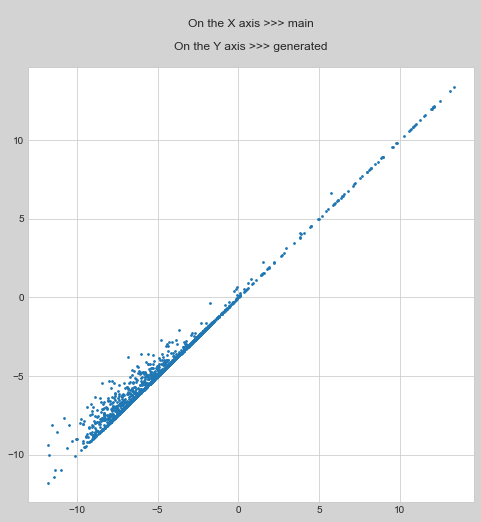

min


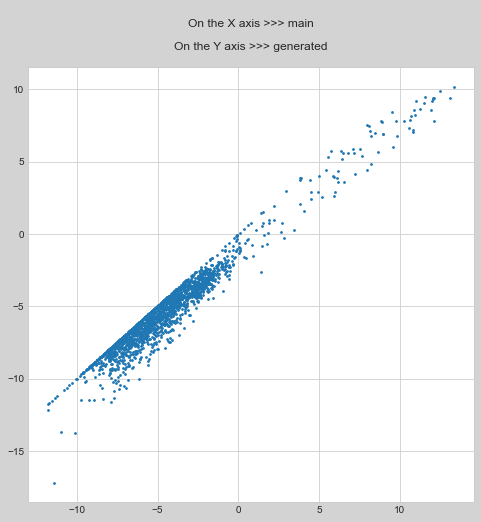

avg


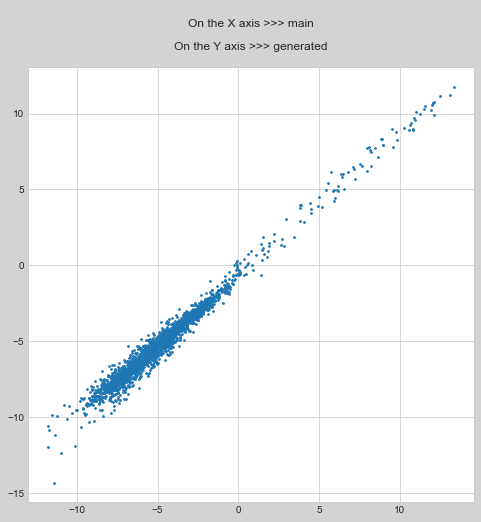

coeff


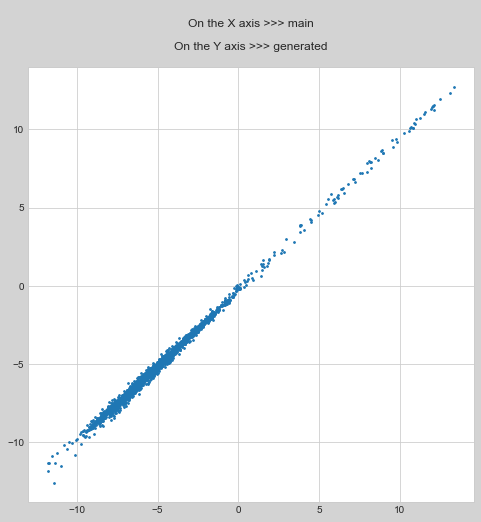

In [12]:
print("max")
drawing(dfs[1], dfs[0], a1, 3)
print("min")
drawing(dfs[1], dfs[0], a2, 3)
print("avg")
drawing(dfs[1], dfs[0], a3, 3)
print("coeff")
drawing(dfs[1], dfs[0], a4, 3)

In [13]:
bagging = a3

In [14]:
bagging.describe()

,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,-4.865976,-5.535966,-4.888102,-1.063442,-6.728697,-5.142532,-6.409741,-3.167653,-6.388688,-5.753852,-6.021409,-5.202174,-3.604496,-6.687570,-5.176992,-4.195714,-5.895504,-5.646440,-4.848331,-6.039887,-6.030378,-6.410033,-5.746623,-4.346209
std,3.562924,2.961743,3.161394,3.335898,2.160561,2.801516,2.608513,3.800380,2.122330,2.309069,2.960194,3.316717,4.440977,1.987354,3.791710,3.885422,3.923748,3.018113,2.809307,2.326994,2.867025,2.299774,2.599891,3.538472
min,-14.243667,-16.452028,-14.303864,-11.952959,-16.256658,-13.282570,-14.989114,-12.116724,-13.367484,-12.595480,-14.242972,-15.086733,-12.540539,-13.078519,-18.479266,-16.161932,-13.345228,-13.650073,-15.516836,-12.814075,-14.620850,-17.987233,-12.771987,-14.715668
25%,-6.953424,-7.565520,-6.913899,-3.604374,-8.051382,-7.087280,-8.256118,-5.736613,-7.684988,-7.241832,-7.943352,-7.603739,-6.549891,-7.830893,-7.625864,-6.559224,-8.313139,-7.741913,-6.795160,-7.626642,-8.101733,-7.726971,-7.176480,-6.348423
50%,-5.550180,-5.565994,-5.323419,-0.966885,-6.780415,-5.625591,-6.432548,-3.442734,-6.649039,-5.980367,-6.176562,-5.382330,-4.676350,-6.682729,-5.521218,-4.931114,-6.248982,-5.457994,-4.784915,-5.956389,-5.906250,-6.192846,-6.027282,-4.830444
75%,-3.718152,-3.910183,-3.565040,1.538446,-5.508518,-3.437546,-4.620125,-1.424294,-5.366081,-4.449691,-4.246817,-3.021356,-2.206687,-5.708677,-3.080680,-3.289712,-4.468170,-3.917396,-3.017178,-4.474317,-3.974402,-4.902589,-4.655299,-3.207417
max,12.717234,7.185841,11.738433,7.002594,6.777248,6.475439,17.655534,8.755377,8.203966,8.882415,14.663359,7.113791,12.429851,11.001591,9.565339,15.688570,14.400022,11.721749,5.898431,23.601410,15.384601,5.223588,21.076940,15.925086


In [15]:
b1,b2,b3,b4 = generate(dfs[2], bagging, 0.8)

max


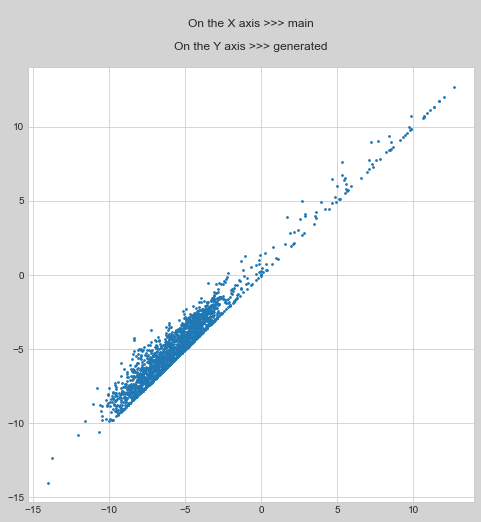

min


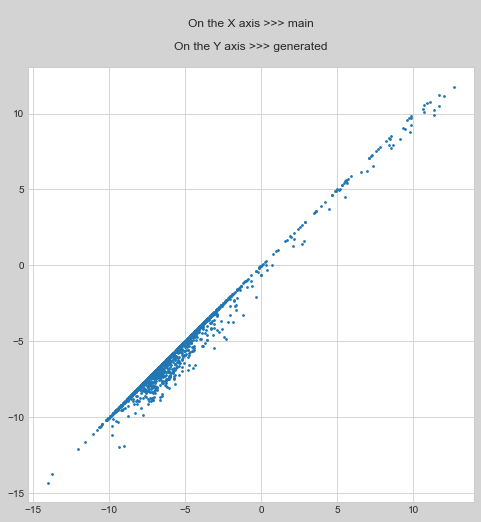

avg


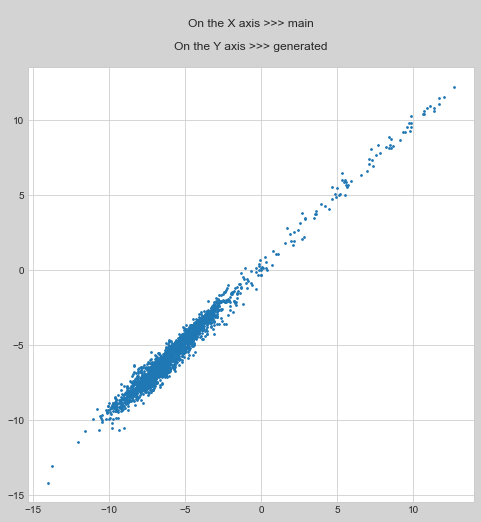

coeff


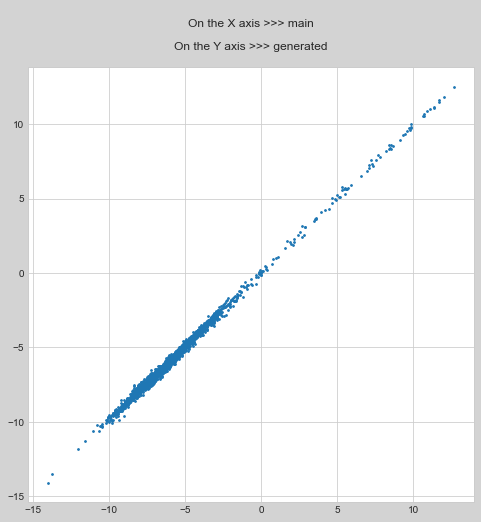

In [16]:
print("max")
drawing(dfs[2], bagging, b1, 3)
print("min")
drawing(dfs[2], bagging, b2, 3)
print("avg")
drawing(dfs[2], bagging, b3, 3)
print("coeff")
drawing(dfs[2], bagging, b4, 3)

In [19]:
c1,c2,c3,c4 = generate(dfs[3], b3, 0.6)

max


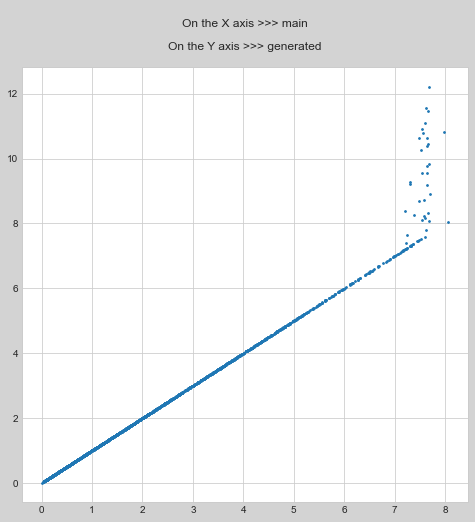

min


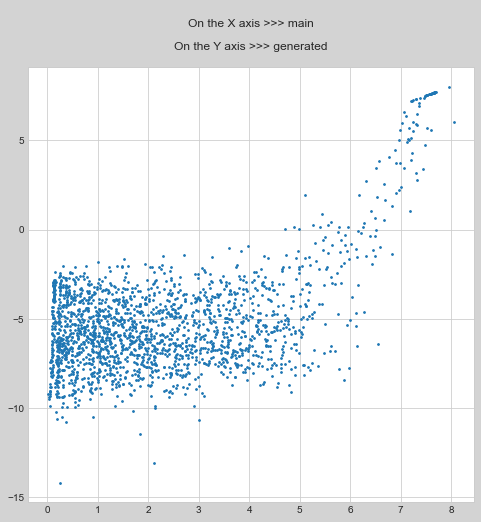

avg


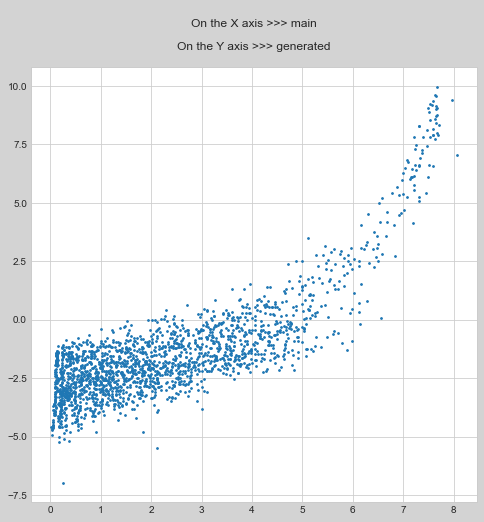

coeff


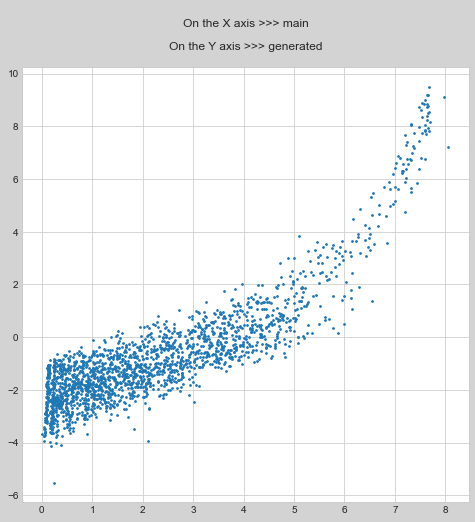

In [20]:
print("max")
drawing(dfs[3], b3, c1, 3)
print("min")
drawing(dfs[3], b3, c2, 3)
print("avg")
drawing(dfs[3], b3, c3, 3)
print("coeff")
drawing(dfs[3], b3, c4, 3)

In [21]:
df_sub = c4

In [22]:
df_sub

,recording_id,s0,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22,s23
0,000316da7,0.183072,0.221678,-0.888812,5.862863,-1.673720,1.857561,-1.451087,1.061059,-1.239686,0.442366,-2.120638,-0.758198,4.669410,-0.987939,1.869660,1.721777,-0.016315,-1.121112,2.277763,-1.867088,-0.479054,0.207156,0.067575,1.355097
1,003bc2cb2,-0.447925,1.471847,-0.868600,4.425196,-1.964393,-2.251370,-2.825953,2.036097,-2.536010,-1.321686,-0.289736,-0.909049,0.362252,-2.301846,0.664062,1.495984,9.692761,0.790351,0.706483,-3.059129,-1.854943,-1.623656,-1.675729,-1.515776
2,0061c037e,1.443292,0.853733,-1.465491,3.168417,-2.277140,1.149672,-0.892112,4.527422,-1.818176,-1.194489,2.429600,-0.006363,-2.109089,-0.817415,0.927889,-0.209456,1.337117,1.537213,-0.354688,0.698888,1.654688,0.242710,1.502027,2.090095
3,010eb14d3,6.586815,-0.954643,-1.875990,-0.514508,0.179062,0.102035,-3.142096,-0.697648,4.175245,0.096086,-1.441658,-3.169593,-0.502995,-1.983867,-0.260240,-1.342893,-2.925266,-4.554652,1.789533,-2.608161,-2.432899,0.353934,-2.653477,-1.539083
4,011318064,-1.560827,-0.919544,0.445576,2.850894,-1.155237,-0.481771,-1.273174,0.683107,-0.711840,-1.306772,-2.568022,-0.216205,-1.661461,-0.160708,5.822188,5.678327,0.840508,0.401169,2.789846,-2.885557,-1.834369,0.707562,-2.179392,-2.098844
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1987,ff68f3ac3,1.469267,-2.367116,-1.973968,1.611652,-0.226392,4.266678,-1.773392,1.420848,-0.392566,-1.448451,-2.459132,-1.338984,1.220679,0.275907,-2.038170,5.383113,-1.006156,-0.840681,-2.634076,-0.841558,1.712060,-0.560920,-0.774411,8.664646
1988,ff973e852,-2.372878,-1.590599,-2.969892,2.846866,-2.290597,-0.154014,-1.663766,5.986352,-1.903057,1.601409,0.979188,0.894792,-2.682719,-3.321925,0.234063,3.860737,-0.890249,2.736355,-1.108615,-0.296014,1.805250,-2.159528,0.374157,1.147443
1989,ffa5cf6d6,-0.471922,-0.232933,-1.520341,5.606658,-2.603696,0.447874,-1.330893,2.454437,-1.621316,1.202740,-1.740262,0.546050,1.098532,-1.972001,0.499983,8.471727,0.641233,2.800536,-0.797234,-1.428697,1.662921,-1.339900,0.114973,-0.088046
1990,ffa88cbb8,0.632014,2.144111,0.678325,5.565299,-2.469490,-0.516147,-3.257703,4.469018,-1.231868,0.668913,-2.727662,-2.197440,0.928811,-0.732172,0.191830,-1.317528,2.992454,-0.772051,-1.241984,-2.210454,-0.764587,-0.061823,-1.600270,0.997358


In [23]:
df_sub.to_csv('submission_bagging.csv', index=False)